### Problem Statement: 

The goal here is to find the chance of admission of a candidate based on his/her GRE Score (out of 340), TOEFL Score (out of 120), rating of the university (out of 5) in wgich he/she is trying to get admission, Strength of the SOP (out of 5), Strength of letter of recommendation (out of 5), CGPA (out of 10), and the research experience (0 or 1).

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('Admission_Prediction.csv')

In [3]:
df.head() # Cheking the first five rows of the dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [6]:
df.isna().sum() # finding the count of missing values from different columns

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [7]:
# replacing the missing values of 'GRE Score' column with the mode of column
df['GRE Score'].fillna(df['GRE Score'].mode()[0], inplace = True)

In [8]:
# replacing the missing values of 'TOEFL Score' column with the mode of column
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0], inplace = True)

In [9]:
# replacing the missing values of 'University Rating' column with the mean of column
df['University Rating'].fillna(df['University Rating'].mean(), inplace = True)

In [10]:
# dropping the 'Chance of Admit' and 'Serial Number' as they are not going to be used as features for prediction
X = df.drop(['Chance of Admit', 'Serial No.'], axis = 1)

# 'Chance of Admit' is the target column which shows the probability of admission for a candidate
y = df['Chance of Admit']

In [11]:
X.head() # Checking the transformed feature columns

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


In [12]:
y.head() # checking the target columns

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

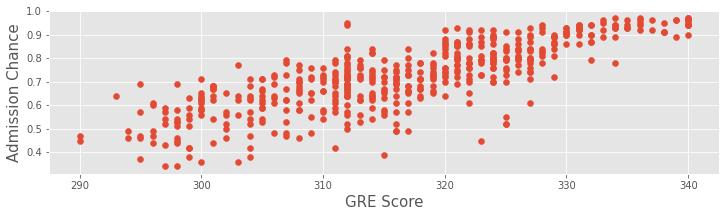

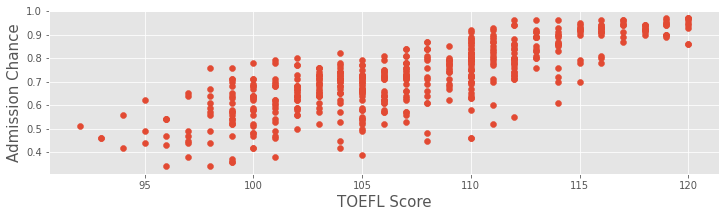

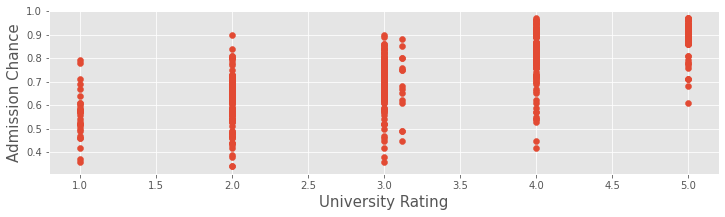

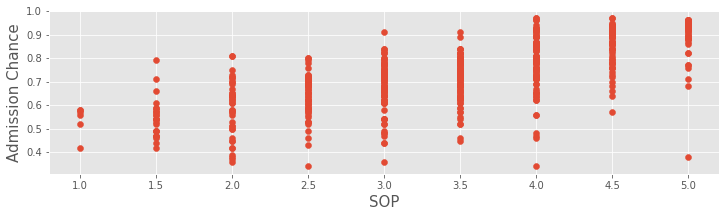

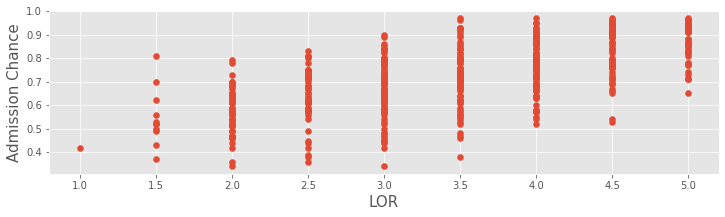

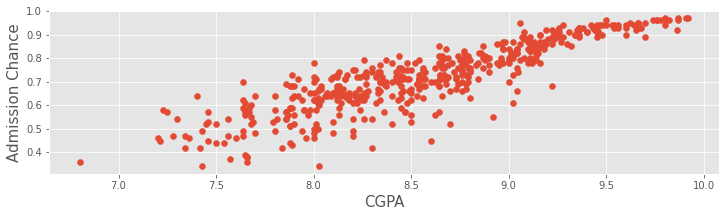

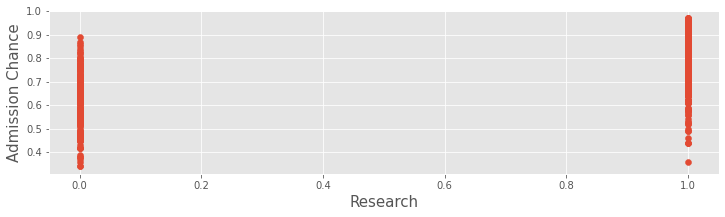

In [13]:
# Showcasing the relationship between all feature columns and target column
for col in X.columns:
    plt.style.use('ggplot')
    plt.figure(figsize = (12, 3))
    plt.scatter(X[col], y)
    plt.xlabel(col, fontsize = 15)
    plt.ylabel('Admission Chance', fontsize = 15)
    plt.show()

In [14]:
# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [15]:
X_train.shape, y_train.shape

((375, 7), (375,))

In [16]:
X_test.shape, y_test.shape

((125, 7), (125,))

In [17]:
# fitting the data to the Linear Regression Model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = reg.predict(X_test).round(2)

In [19]:
y_pred[:10]

array([0.86, 0.47, 0.62, 0.44, 0.64, 0.86, 0.59, 0.67, 0.82, 0.68])

In [24]:
# Comparing predicted results with actual values
results = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
results.head(20)

,Actual Value,Predicted Value
69,0.78,0.86
29,0.54,0.47
471,0.64,0.62
344,0.47,0.44
54,0.70,0.64
189,0.88,0.86
463,0.57,0.59
184,0.72,0.67
140,0.84,0.82
125,0.64,0.68


In [20]:
# Calculating the accuracy of the model 
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.8276530163499294

In [21]:
# Saving the model to the local file system
import pickle
filename = 'finalized_model.pickle'
pickle.dump(reg, open(filename, 'wb'))

In [22]:
loaded_model = pickle.load(open(filename, 'rb'))
a = loaded_model.predict([[300, 110, 5, 5, 5, 10, 1]])
a

array([0.9367482])